In [1]:
!source activate /home/gilbee3/anaconda3/envs/akita

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import operator as op
import seaborn as sns
sns.set(color_codes=True) # Seaborn desaturates matplotlib colors (this is useful if you use both seaborn and basic matplot lib and want colors to be consistent)
import scipy.stats as stats
sns.set(palette='husl', context = 'poster', style='white')
import os
import scikit_posthocs as sp

In [3]:
BASE_PATH = "/".join(os.getcwd().split("/")[:-2]) # base directory level

BIN_PATH = os.path.join(BASE_PATH, "bin")  # where my scripts live
DATA_PATH = os.path.join(BASE_PATH, "data")  # where I dump new data.
RESULTS_PATH = os.path.join(BASE_PATH, "results")  # where I analyze results

SRC_PATH = os.path.join(BASE_PATH, "src")  # where any packages needed to run analyses live. I haven't started structuring things this way yet. 

COMP_PATH = os.path.join(DATA_PATH,"pairwise")

In [4]:
ref_mse = pd.read_table('/wynton/group/capra/projects/modern_human_3Dgenome/results/comp_tables/ref_window_mse.csv'
                    , sep=',', header=[0,1,2,3], index_col=[0,1])
ref_spear = pd.read_table('/wynton/group/capra/projects/modern_human_3Dgenome/results/comp_tables/ref_window_spearman.csv'
                    , sep=',', header=[0,1,2,3], index_col=[0,1])
ref_div = 1-ref_spear

gagp_mse = pd.read_table('/wynton/group/capra/projects/modern_human_3Dgenome/results/comp_tables/gagp_window_mse.csv'
                    , sep=',', header=[0,1,2,3], index_col=[0,1])
gagp_spear = pd.read_table('/wynton/group/capra/projects/modern_human_3Dgenome/results/comp_tables/gagp_window_spearman.csv'
                    , sep=',', header=[0,1,2,3], index_col=[0,1])
gagp_div = 1-gagp_spear

hsmrca_mse = pd.read_table('/wynton/group/capra/projects/modern_human_3Dgenome/results/comp_tables/anc_window_mse.csv'
                    , sep=',', header=[0,1,2,3], index_col=[0,1])
hsmrca_spear = pd.read_table('/wynton/group/capra/projects/modern_human_3Dgenome/results/comp_tables/anc_window_spearman.csv'
                    , sep=',', header=[0,1,2,3], index_col=[0,1])
hsmrca_div = 1-hsmrca_spear

In [5]:
avg_indivs = pd.DataFrame([ref_mse.mean(axis=1), ref_div.mean(axis=1), 
                           gagp_mse.mean(axis=1),gagp_div.mean(axis=1),
                            hsmrca_mse.mean(axis=1), hsmrca_div.mean(axis=1)]).transpose()
avg_indivs.columns=['ref_mse','ref_div','gagp_mse','gagp_div','hsmrca_mse','hsmrca_div']

## Averaged scatter plots

In [6]:
hsmrca_spear.mean(axis=1).describe()

count    4873.000000
mean        0.995651
std         0.009353
min         0.795863
25%         0.995893
50%         0.998211
75%         0.999106
max         1.000000
dtype: float64

Text(0.5, 1.0, 'GAGP Divergence')

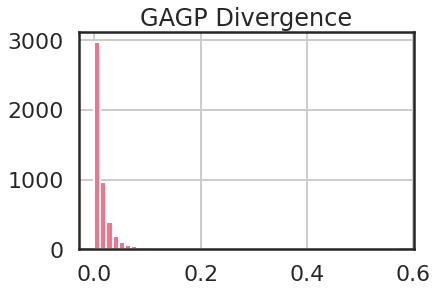

In [7]:
avg_indivs.gagp_div.hist(bins=50)
plt.title('GAGP Divergence')

Text(0.5, 1.0, 'hg38 Divergence')

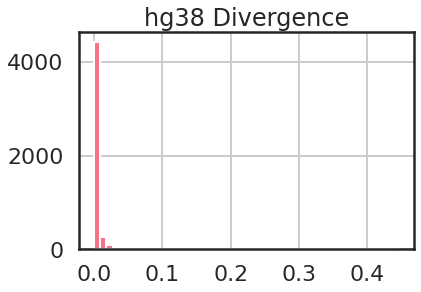

In [8]:
avg_indivs.ref_div.hist(bins=50)
plt.title('hg38 Divergence')

Text(0.5, 1.0, 'New HSMRCA Divergence')

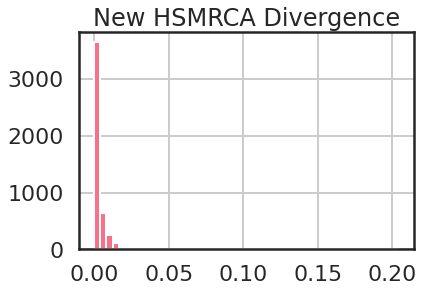

In [9]:
avg_indivs.hsmrca_div.hist(bins=50)
plt.title('New HSMRCA Divergence')

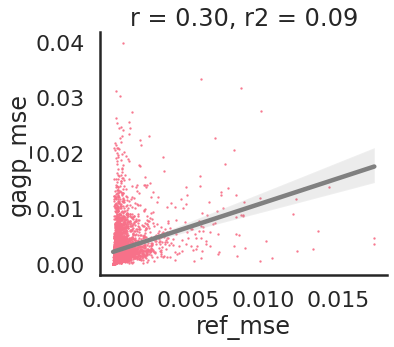

In [10]:
g = sns.lmplot(x='ref_mse',y='gagp_mse', data=avg_indivs,scatter_kws={'s':2}, line_kws={'color': 'gray'},aspect=1.2)
slope, intercept, r, p, se = stats.linregress(avg_indivs['ref_mse'].values, avg_indivs['gagp_mse'].values)
_ = plt.title('r = %0.2f, r2 = %0.2f' % (r, r**2))

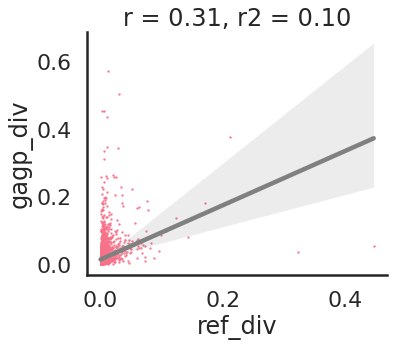

In [11]:
g = sns.lmplot(x='ref_div',y='gagp_div', data=avg_indivs,scatter_kws={'s':2}, line_kws={'color': 'gray'},aspect=1.2)
slope, intercept, r, p, se = stats.linregress(avg_indivs['ref_div'].values, avg_indivs['gagp_div'].values)
_ = plt.title('r = %0.2f, r2 = %0.2f' % (r, r**2))

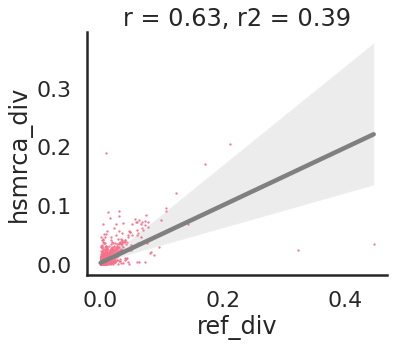

In [12]:
g = sns.lmplot(x='ref_div',y='hsmrca_div', data=avg_indivs,scatter_kws={'s':2}, line_kws={'color': 'gray'},aspect=1.2)
slope, intercept, r, p, se = stats.linregress(avg_indivs['ref_div'].values, avg_indivs['hsmrca_div'].values)
_ = plt.title('r = %0.2f, r2 = %0.2f' % (r, r**2))

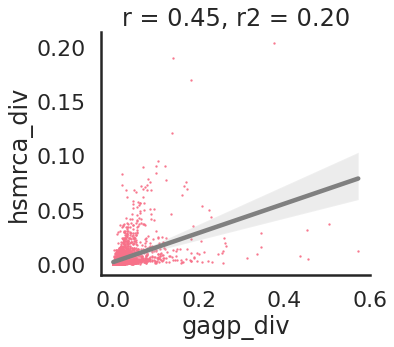

In [13]:
g = sns.lmplot(x='gagp_div',y='hsmrca_div', data=avg_indivs,scatter_kws={'s':2}, line_kws={'color': 'gray'},aspect=1.2)
slope, intercept, r, p, se = stats.linregress(avg_indivs['gagp_div'].values, avg_indivs['hsmrca_div'].values)
_ = plt.title('r = %0.2f, r2 = %0.2f' % (r, r**2))

In [14]:
def get_bins(binwidth, data):
    return np.arange(min(data), max(data) + binwidth, binwidth)

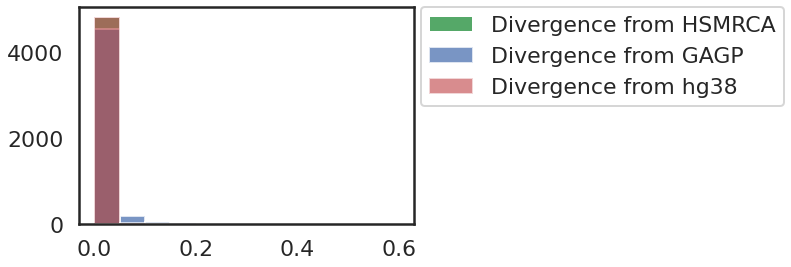

In [16]:

binwidth = 0.05

plt.hist(avg_indivs.hsmrca_div, bins=get_bins(binwidth, avg_indivs.hsmrca_div), range=[0,.1], alpha=1, color='g', label='Divergence from HSMRCA')
plt.hist(avg_indivs.gagp_div, bins=get_bins(binwidth, avg_indivs.gagp_div), range=[0,.1], alpha=0.75, color='b', label='Divergence from GAGP')
plt.hist(avg_indivs.ref_div, bins=get_bins(binwidth, avg_indivs.ref_div), range=[0,.1], alpha=0.65, color='r', label='Divergence from hg38')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

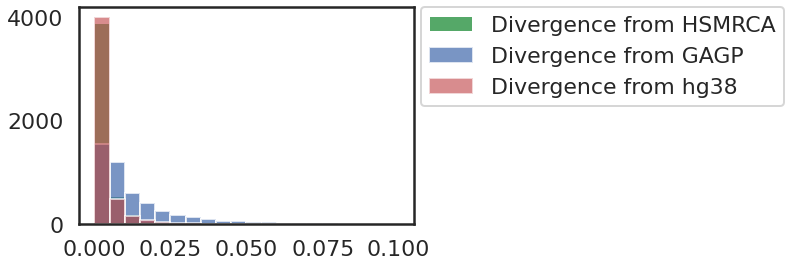

In [17]:
plt.hist(avg_indivs.hsmrca_div, bins=20, range=[0,.1], alpha=1, color='g', label='Divergence from HSMRCA')
plt.hist(avg_indivs.gagp_div, bins=20, range=[0,.1], alpha=0.75, color='b', label='Divergence from GAGP')
plt.hist(avg_indivs.ref_div, bins=20, range=[0,.1], alpha=0.65, color='r', label='Divergence from hg38')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

In [18]:
avg_indivs['abs_difference'] = np.abs(avg_indivs.gagp_div - avg_indivs.ref_div)
avg_indivs['difference'] = avg_indivs.gagp_div - avg_indivs.ref_div

avg_indivs['abs_difference_new'] = np.abs(avg_indivs.hsmrca_div - avg_indivs.ref_div)
avg_indivs['difference_new'] = avg_indivs.hsmrca_div - avg_indivs.ref_div

avg_indivs['abs_difference_new_gagp'] = np.abs(avg_indivs.hsmrca_div - avg_indivs.gagp_div)
avg_indivs['difference_new_gagp'] = avg_indivs.hsmrca_div - avg_indivs.gagp_div

# What are the most extreme regions like?

In [19]:
gagp_top = avg_indivs.sort_values('gagp_div', ascending=False).head(5).index
ref_top = avg_indivs.sort_values('ref_div', ascending=False).head(5).index

hsmrca_top = avg_indivs.sort_values('hsmrca_div', ascending=False).head(5).index

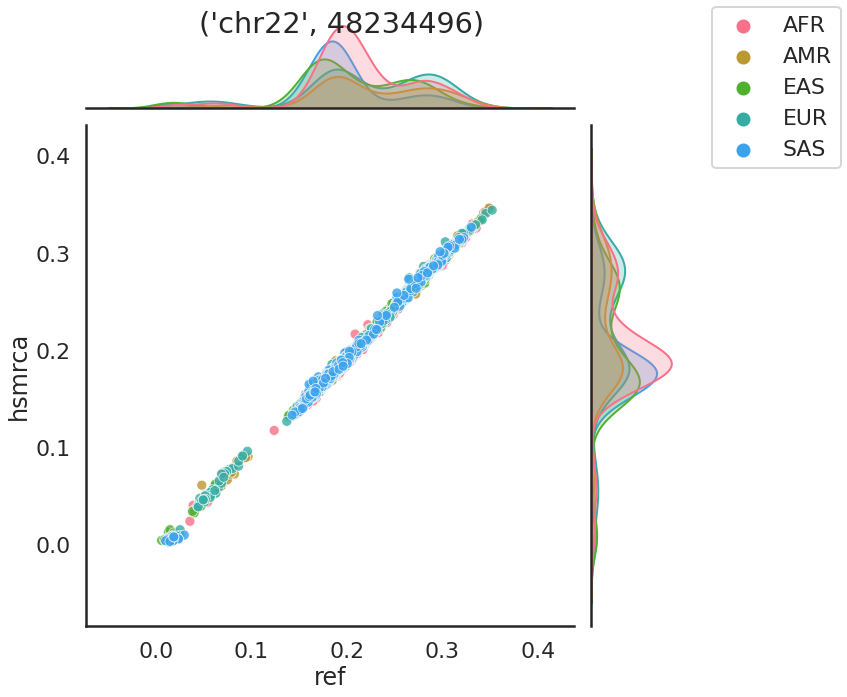

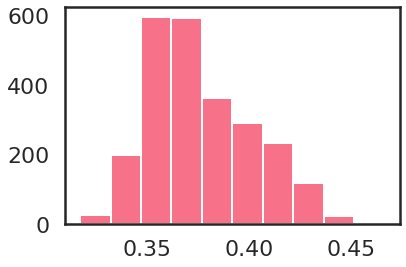

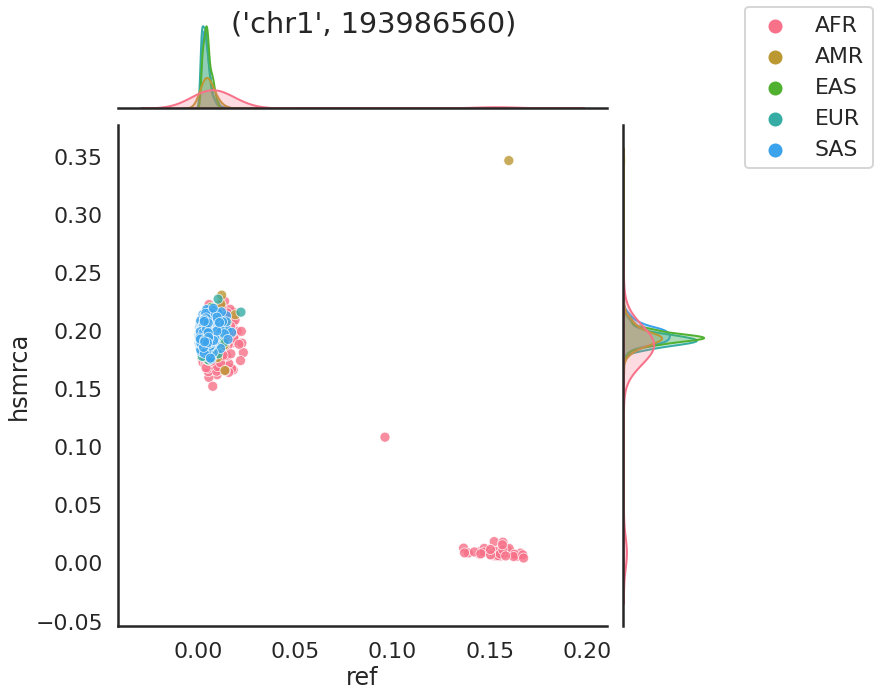

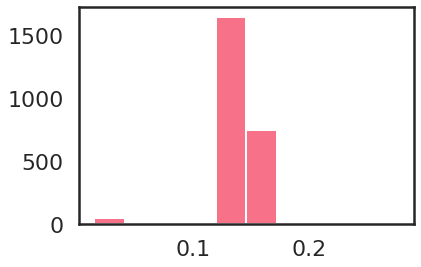

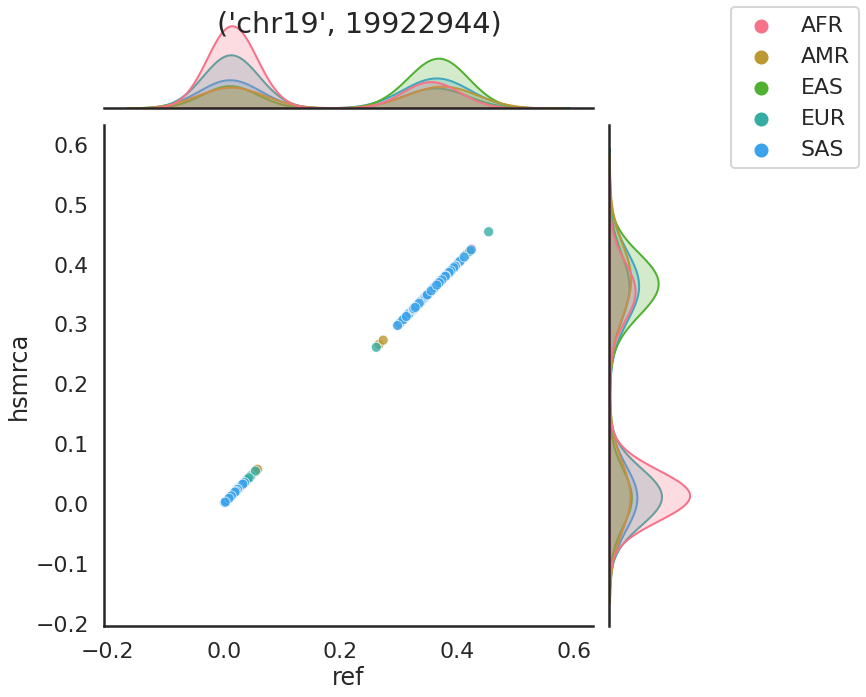

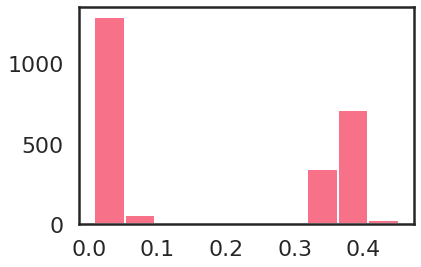

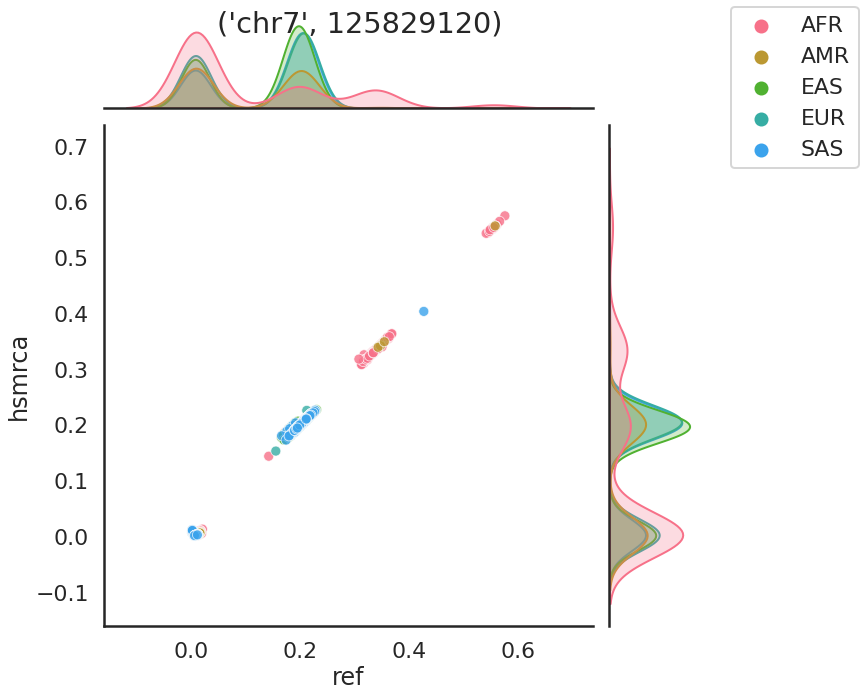

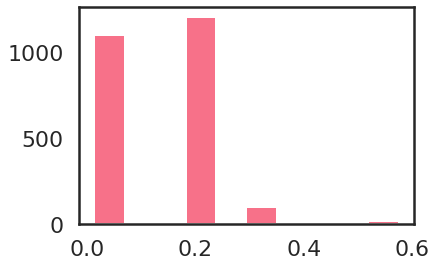

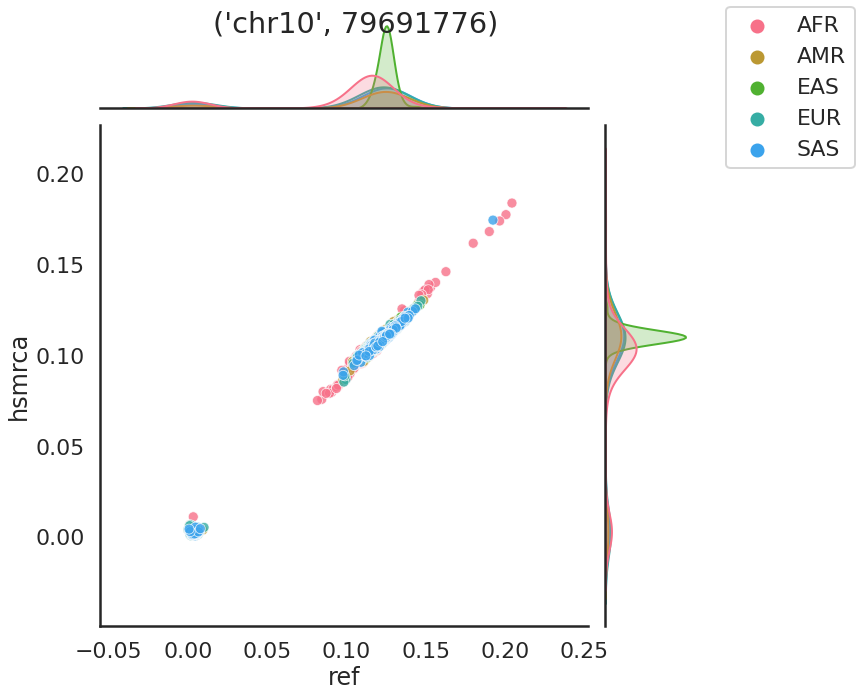

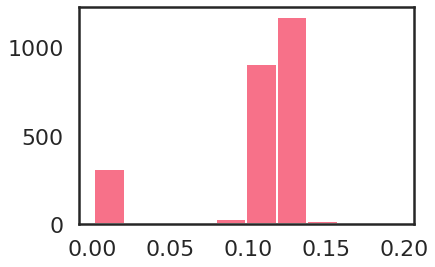

In [21]:
for i in hsmrca_top:
    top = pd.DataFrame([gagp_div.loc[i],ref_div.loc[i], hsmrca_div.loc[i]], index=['gagp','ref','hsmrca']).transpose()
    top['super_pop'] = top.index.get_level_values(0)
    ax = sns.jointplot(data=top, x="ref", y="hsmrca", hue="super_pop",height=10,s=100, alpha=0.8)
    ax.ax_joint.legend_._visible=False
    ax.fig.legend(bbox_to_anchor=(1, 1), loc=2)
    ax.fig.suptitle(i)
    plt.show()
    plt.hist(top['gagp'])

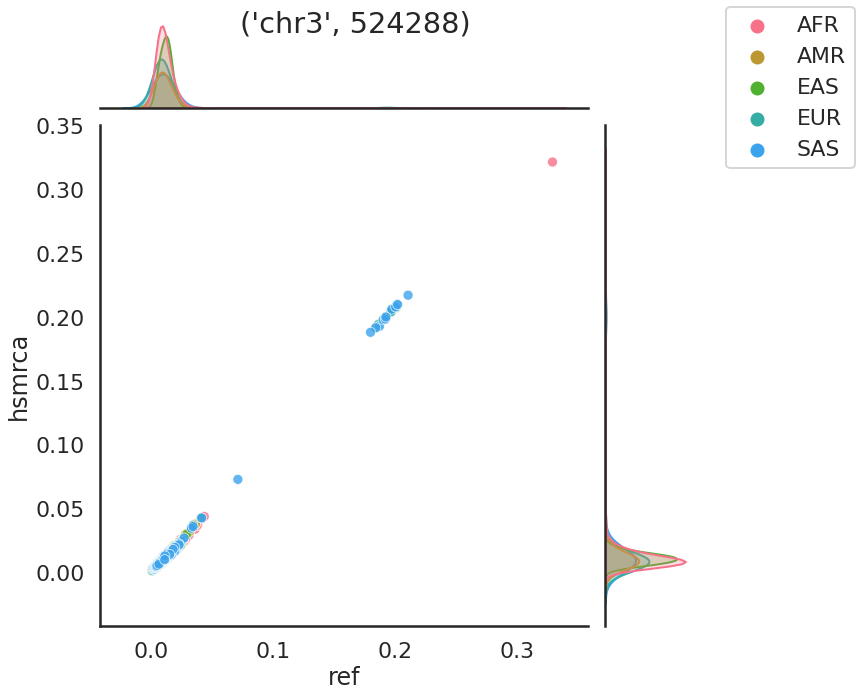

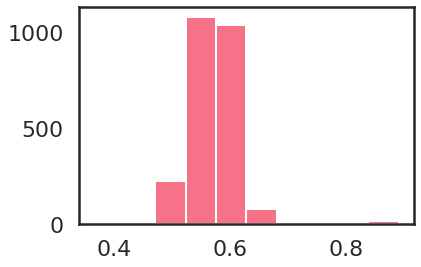

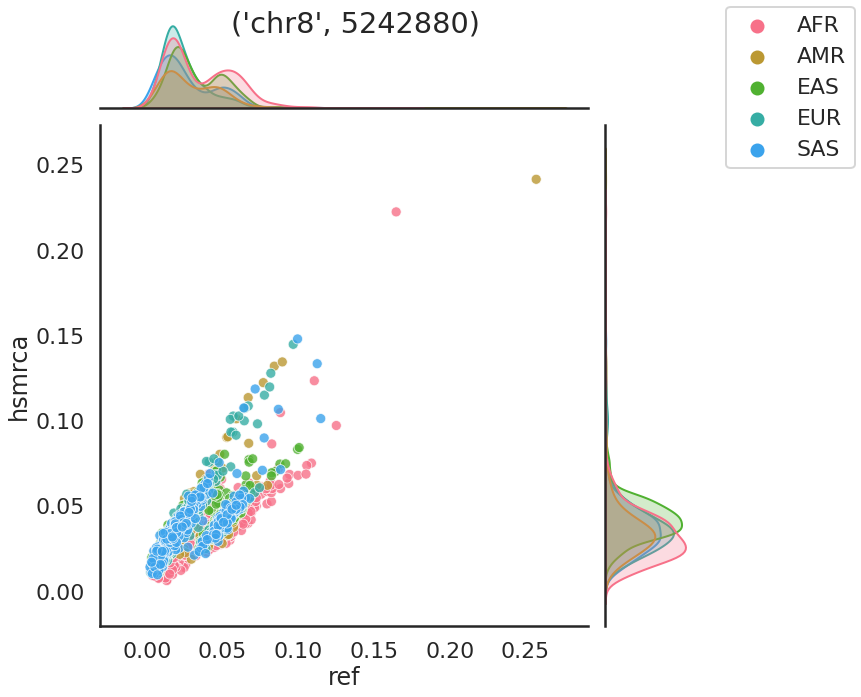

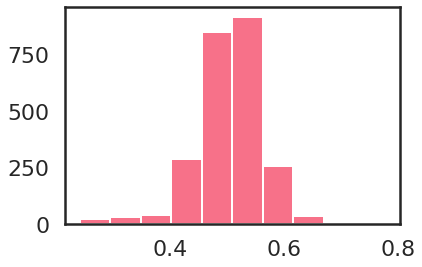

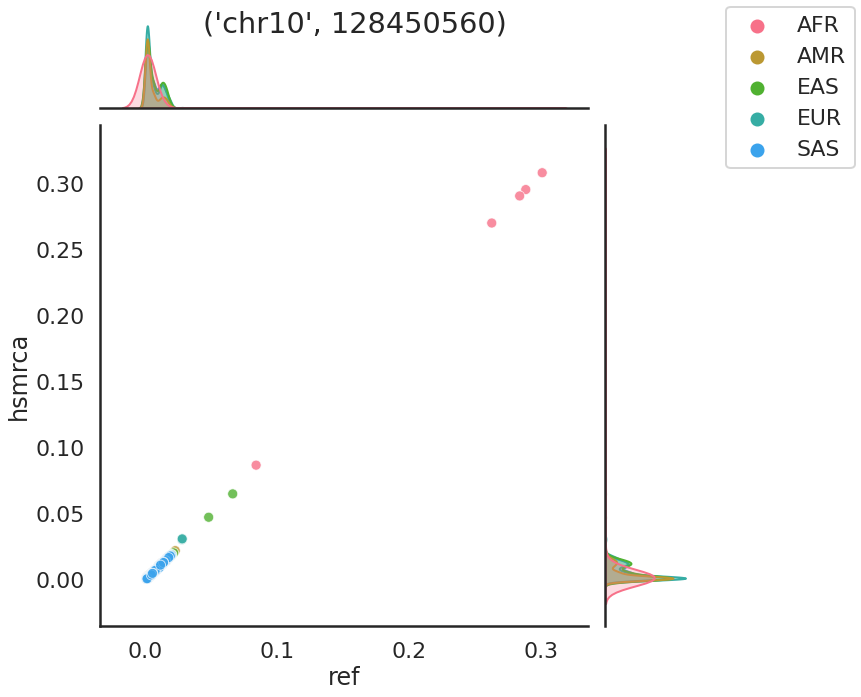

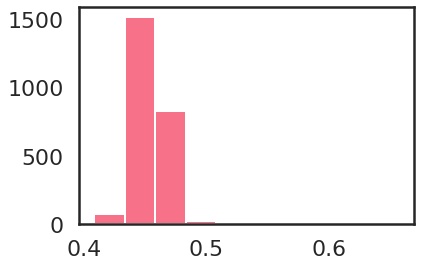

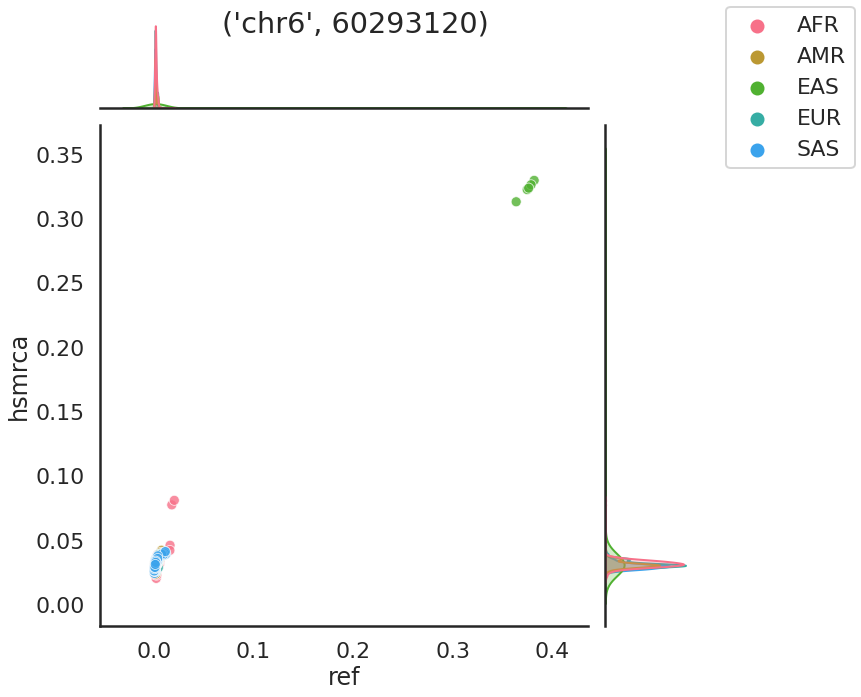

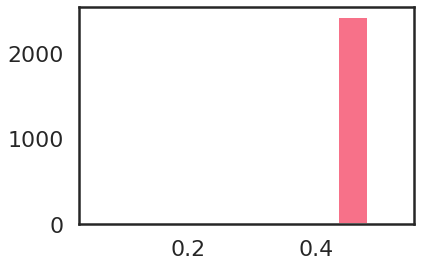

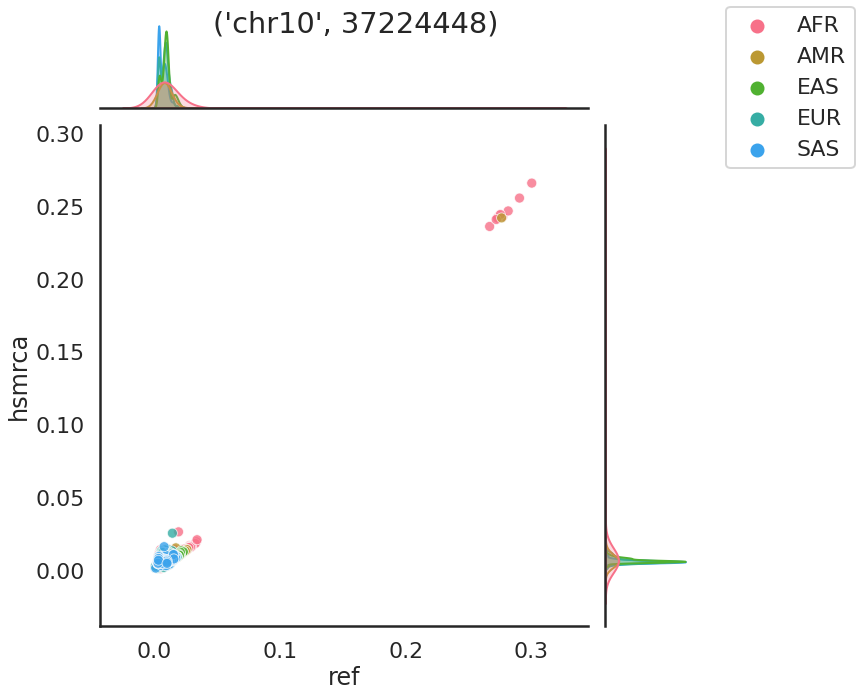

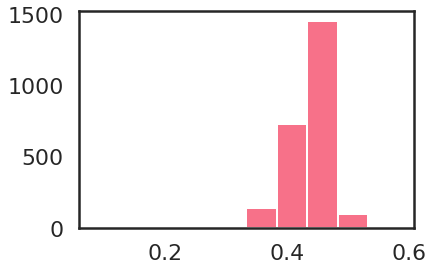

In [22]:
for i in gagp_top:
    top = pd.DataFrame([gagp_div.loc[i],ref_div.loc[i], hsmrca_div.loc[i]], index=['gagp','ref','hsmrca']).transpose()
    top['super_pop'] = top.index.get_level_values(0)
    ax = sns.jointplot(data=top, x="ref", y="hsmrca", hue="super_pop",height=10,s=100, alpha=0.8)
    ax.ax_joint.legend_._visible=False
    ax.fig.legend(bbox_to_anchor=(1, 1), loc=2)
    ax.fig.suptitle(i)
    plt.show()
    plt.hist(top['gagp'])

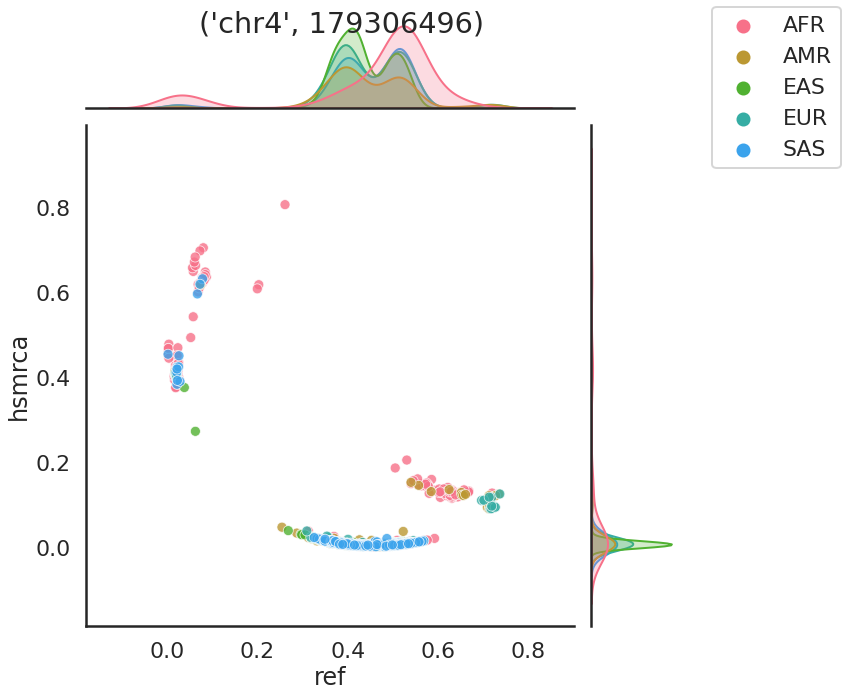

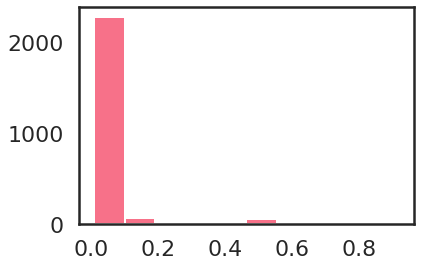

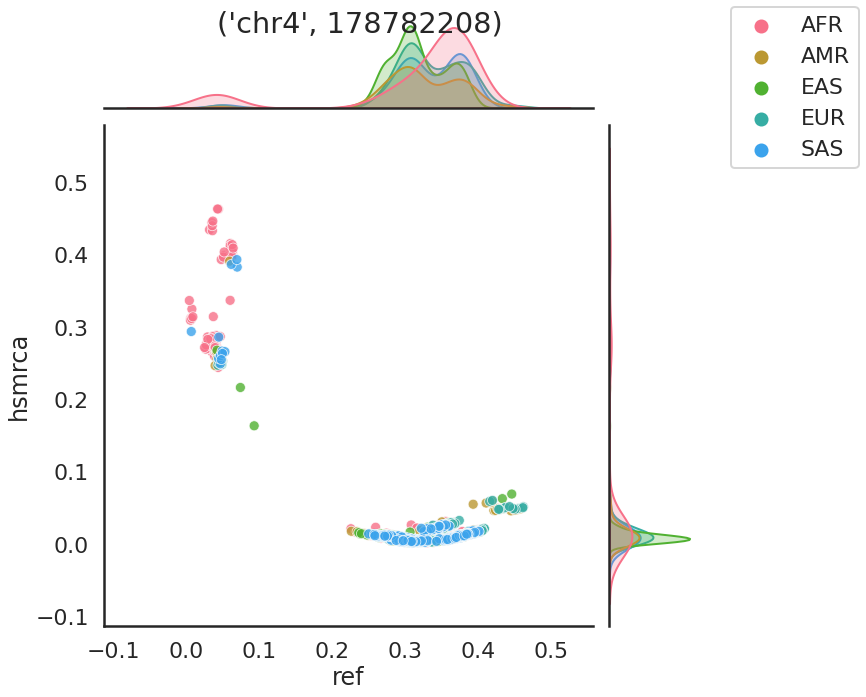

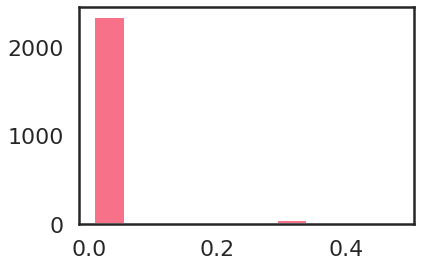

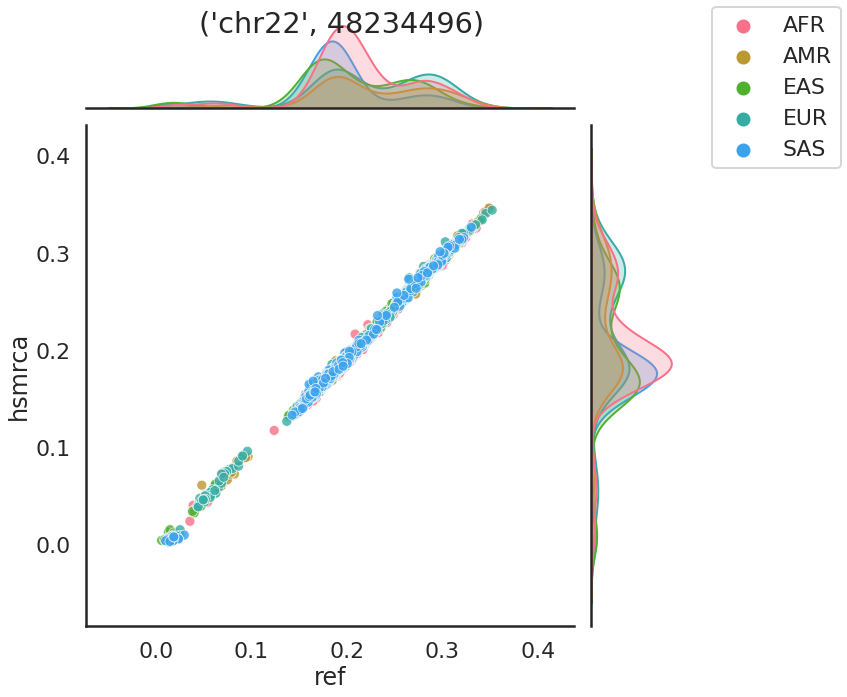

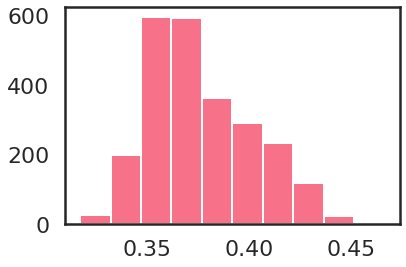

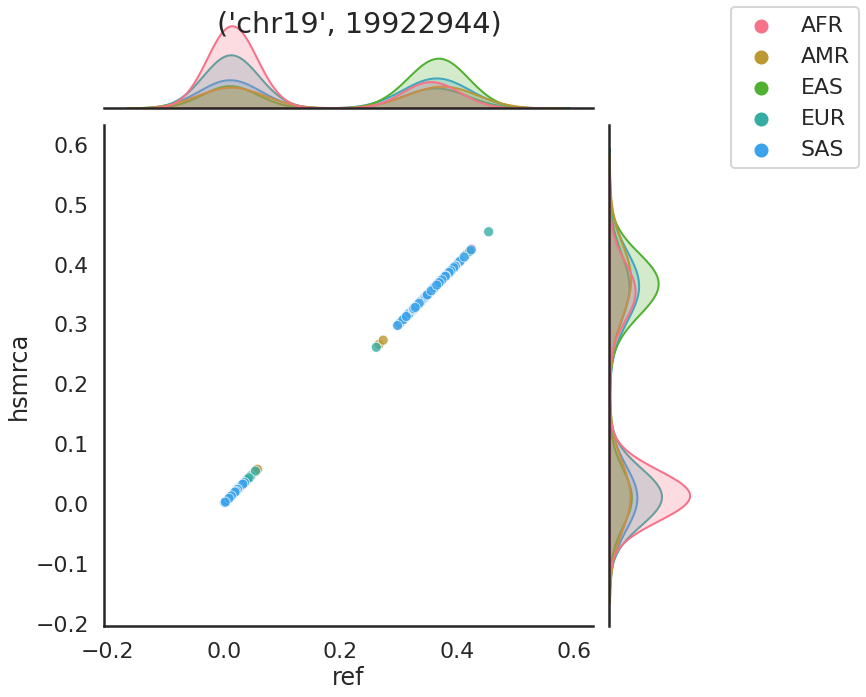

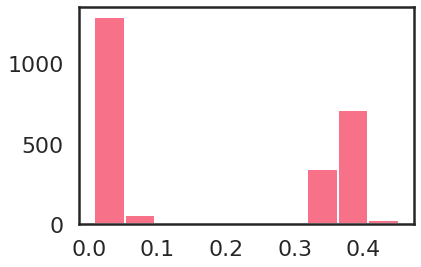

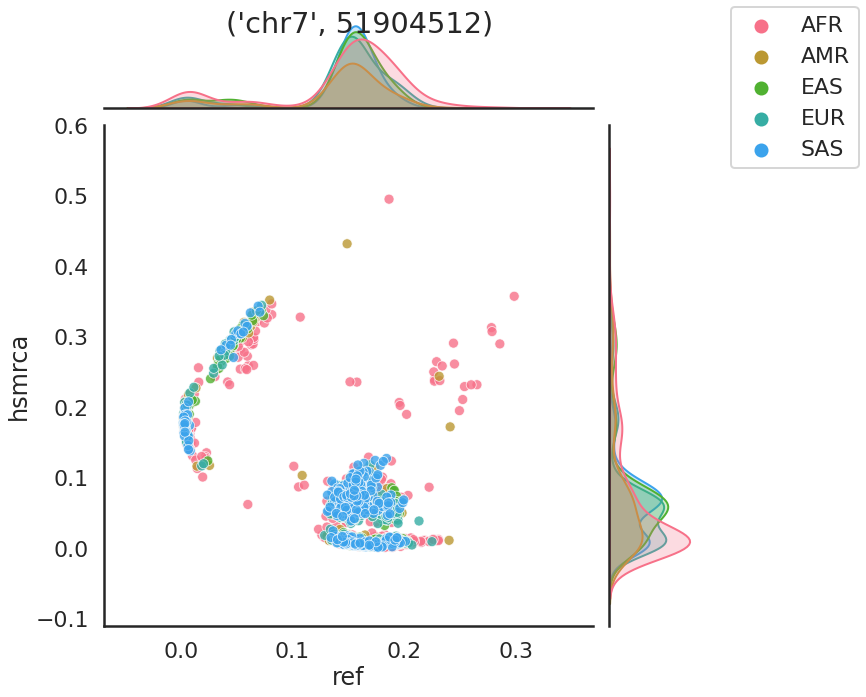

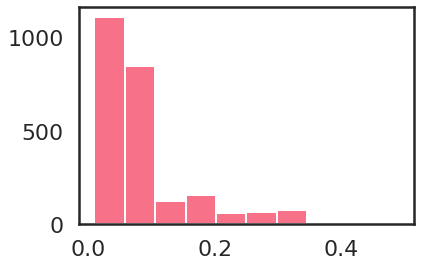

In [23]:
for i in ref_top:
    top = pd.DataFrame([gagp_div.loc[i],ref_div.loc[i], hsmrca_div.loc[i]], index=['gagp','ref','hsmrca']).transpose()
    top['super_pop'] = top.index.get_level_values(0)
    ax = sns.jointplot(data=top, x="ref", y="hsmrca", hue="super_pop",height=10,s=100, alpha=0.8)
    ax.ax_joint.legend_._visible=False
    ax.fig.legend(bbox_to_anchor=(1, 1), loc=2)
    ax.fig.suptitle(i)
    plt.show()
    plt.hist(top['gagp'])